In [ ]:
!unzip '/content/AI-powered Nutrition Analyzer for Fitness Enthusiast.zip'

Archive:  /content/AI-powered Nutrition Analyzer for Fitness Enthusiast.zip
  inflating: Dataset/TEST_SET/WATERMELON/125_100.jpg  
  inflating: Dataset/TEST_SET/WATERMELON/129_100.jpg  
  inflating: Dataset/TEST_SET/WATERMELON/205_100.jpg  
  inflating: Dataset/TEST_SET/WATERMELON/134_100.jpg  
  inflating: Dataset/TEST_SET/WATERMELON/144_100.jpg  
  inflating: Dataset/TEST_SET/WATERMELON/137_100.jpg  
  inflating: Dataset/TEST_SET/WATERMELON/189_100.jpg  
  inflating: Dataset/TEST_SET/WATERMELON/185_100.jpg  
  inflating: Dataset/TEST_SET/WATERMELON/139_100.jpg  
  inflating: Dataset/TEST_SET/WATERMELON/206_100.jpg  
  inflating: Dataset/TEST_SET/WATERMELON/235_100.jpg  
  inflating: Dataset/TEST_SET/WATERMELON/151_100.jpg  
  inflating: Dataset/TEST_SET/WATERMELON/207_100.jpg  
  inflating: Dataset/TEST_SET/WATERMELON/136_100.jpg  
  inflating: Dataset/TEST_SET/WATERMELON/138_100.jpg  
  inflating: Dataset/TEST_SET/WATERMELON/186_100.jpg  
  inflating: Dataset/TEST_SET/WATERMELON/176

In [ ]:
!unzip '/content/Dataset/TRAIN_SET.zip'

Archive:  /content/Dataset/TRAIN_SET.zip
   creating: TRAIN_SET/APPLES/
  inflating: TRAIN_SET/APPLES/0_100.jpg  
  inflating: TRAIN_SET/APPLES/1_100.jpg  
  inflating: TRAIN_SET/APPLES/10_100.jpg  
  inflating: TRAIN_SET/APPLES/100_100.jpg  
  inflating: TRAIN_SET/APPLES/101_100.jpg  
  inflating: TRAIN_SET/APPLES/102_100.jpg  
  inflating: TRAIN_SET/APPLES/103_100.jpg  
  inflating: TRAIN_SET/APPLES/104_100.jpg  
  inflating: TRAIN_SET/APPLES/105_100.jpg  
  inflating: TRAIN_SET/APPLES/106_100.jpg  
  inflating: TRAIN_SET/APPLES/107_100.jpg  
  inflating: TRAIN_SET/APPLES/108_100.jpg  
  inflating: TRAIN_SET/APPLES/109_100.jpg  
  inflating: TRAIN_SET/APPLES/11_100.jpg  
  inflating: TRAIN_SET/APPLES/110_100.jpg  
  inflating: TRAIN_SET/APPLES/111_100.jpg  
  inflating: TRAIN_SET/APPLES/112_100.jpg  
  inflating: TRAIN_SET/APPLES/113_100.jpg  
  inflating: TRAIN_SET/APPLES/114_100.jpg  
  inflating: TRAIN_SET/APPLES/115_100.jpg  
  inflating: TRAIN_SET/APPLES/116_100.jpg  
  inflatin

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_gen = ImageDataGenerator(rescale=(1./255),horizontal_flip=True,shear_range=0.2)
test_gen = ImageDataGenerator(rescale=(1./255))  #--> (0 to 255) convert to (0 to 1)


train = train_gen.flow_from_directory('//content/TRAIN_SET',
                                      target_size=(120, 120),
                                      class_mode='categorical',
                                      batch_size=8)
test = test_gen.flow_from_directory('/content/Dataset/TEST_SET',
                                    target_size=(120, 120),
                                      class_mode='categorical',
                                      batch_size=8)

Found 2626 images belonging to 5 classes.
Found 1055 images belonging to 5 classes.


In [ ]:
train.class_indices

{'APPLES': 0, 'BANANA': 1, 'ORANGE': 2, 'PINEAPPLE': 3, 'WATERMELON': 4}

In [ ]:
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Convolution2D(20,(3,3),activation='relu',input_shape=(120, 120, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(45,activation='relu'))
model.add(Dense(5,activation='softmax'))

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(train,validation_data=test,epochs=30)


Epoch 1/30
329/329 [==============================] - 50s 148ms/step - loss: 0.2163 - accuracy: 0.9558 - val_loss: 0.0036 - val_accuracy: 1.0000
Epoch 2/30
329/329 [==============================] - 49s 149ms/step - loss: 5.7966e-04 - accuracy: 1.0000 - val_loss: 0.0040 - val_accuracy: 1.0000
Epoch 3/30
329/329 [==============================] - 50s 153ms/step - loss: 1.3238e-04 - accuracy: 1.0000 - val_loss: 0.0036 - val_accuracy: 1.0000
Epoch 4/30
329/329 [==============================] - 51s 153ms/step - loss: 5.7739e-05 - accuracy: 1.0000 - val_loss: 0.0052 - val_accuracy: 1.0000
Epoch 5/30
329/329 [==============================] - 52s 158ms/step - loss: 3.2850e-05 - accuracy: 1.0000 - val_loss: 0.0073 - val_accuracy: 1.0000
Epoch 6/30
329/329 [==============================] - 48s 146ms/step - loss: 2.0083e-05 - accuracy: 1.0000 - val_loss: 0.0054 - val_accuracy: 1.0000
Epoch 7/30
329/329 [==============================] - 53s 160ms/step - loss: 1.2554e-05 - accuracy: 1.0000 - v

In [ ]:
from tensorflow.keras.models import load_model
from keras.preprocessing import image
import numpy as np
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array

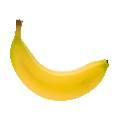

In [ ]:
img1 = load_img('/content/banana_1.jpg',target_size=(120,120))
img1

In [ ]:
img1 = load_img('/content/banana_1.jpg',target_size=(120,120))
img1 = img_to_array(img1)
img1 = np.expand_dims(img1,axis=0)
pred = np.argmax(model.predict(img1))
print(pred)
output = ['APPLES', 'BANANA', 'ORANGE', 'PINEAPPLE', 'WATERMELON']
print(output[pred])

1/1 [==============================] - 0s 111ms/step
1
BANANA


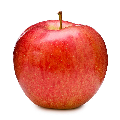

In [ ]:
img2 = load_img('/content/apple_1.jpg',target_size=(120,120))
img2

In [ ]:
img2 = load_img('/content/apple_1.jpg',target_size=(120,120))
img2 = img_to_array(img2)
img2 = np.expand_dims(img2,axis=0)
pred = np.argmax(model.predict(img2))
print(pred)
output = ['APPLES', 'BANANA', 'ORANGE', 'PINEAPPLE', 'WATERMELON']
print(output[pred])

1/1 [==============================] - 0s 26ms/step
0
APPLES
